<a href="https://colab.research.google.com/github/shawntharoo/GoogleColabProjects/blob/main/churn_Data_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DATA6000 # Data Preprocessing



In [ ]:
# installation using PIP
!pip install tsfresh
!pip install "featuretools[complete]"
!pip install composeml
!pip install utils
!pip install matplotlib==3.4.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 97 kB 3.0 MB/s 
     |████████████████████████████████| 136 kB 44.3 MB/s 
     |████████████████████████████████| 1.1 MB 53.3 MB/s 
     |████████████████████████████████| 9.8 MB 32.7 MB/s 
     |████████████████████████████████| 1.3 MB 27.6 MB/s 
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.17.3
    Uninstalling protobuf-3.17.3:
      Successfully uninstalled protobuf-3.17.3
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-metadata 1.10.0 requires protobuf<4,>=3.13, but you have protobuf 3.11.2 which is incompa

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 362 kB 6.6 MB/s 
     |████████████████████████████████| 207 kB 48.6 MB/s 
     |████████████████████████████████| 281 kB 45.8 MB/s 
     |████████████████████████████████| 57 kB 396 kB/s 
     |████████████████████████████████| 612 kB 46.7 MB/s 
     |████████████████████████████████| 44.7 MB 1.2 MB/s 
     |████████████████████████████████| 281.3 MB 45 kB/s 
     |████████████████████████████████| 199 kB 44.8 MB/s 
  Created wheel for pyspark: filename=pyspark-3.3.0-py2.py3-none-any.whl size=281764026 sha256=9ef01b3036ed8b22156c214a07334d94b69f42f42d3eee14691ad755bc7113ba
  Stored in directory: /root/.cache/pip/wheels/7a/8e/1b/f73a52650d2e5f337708d9f6a1750d451a7349a867f928b885
Successfully built pyspark
  Attempting uninstall: psutil
    Found existing installation: psutil 5.4.8
    Uninstalling psutil-5.4.8:
      Successfully uninstalled psutil-

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.2 MB 12.7 MB/s 
     |████████████████████████████████| 957 kB 52.2 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 10.3 MB 8.3 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.3
    Uninstalling matplotlib-3.5.3:
      Successfully uninstalled matplotlib-3.5.3


In [ ]:
import utils
import os
os.environ["PYARROW_IGNORE_TIMEZONE"] = "1"

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# featuretools and compose-ML
import composeml as cp
import featuretools as ft

/usr/local/lib/python3.7/dist-packages/alteryx_open_src_update_checker/functions.py:38: UserWarning: composeml is out-of-date: installed == 0.8.0, latest == 0.9.0
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/woodwork/__init__.py:23: FutureWarning: Woodwork may not support Python 3.7 in next non-bugfix release.
  "Woodwork may not support Python 3.7 in next non-bugfix release.", FutureWarning
/usr/local/lib/python3.7/dist-packages/alteryx_open_src_update_checker/functions.py:38: UserWarning: woodwork is out-of-date: installed == 0.16.4, latest == 0.18.0
  warnings.warn(msg)
ERROR:numba.cuda.cudadrv.driver:Call to cuInit results in CUDA_ERROR_NO_DEVICE
/usr/local/lib/python3.7/dist-packages/featuretools/__init__.py:67: FutureWarning: Featuretools may not support Python 3.7 in next non-bugfix release.
  FutureWarning,


In [ ]:
# basic machine learning
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# stats
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import mean_squared_error
from sklearn.metrics import precision_score, recall_score
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

/usr/local/lib/python3.7/dist-packages/alteryx_open_src_update_checker/functions.py:38: UserWarning: featuretools is out-of-date: installed == 1.11.1, latest == 1.14.0
  warnings.warn(msg)


In [ ]:
from sklearn.ensemble import RandomForestRegressor

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler

from sklearn.metrics import r2_score

from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# visual libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Load Dataset**

In [ ]:
# use pandas (alias as pd) to read and load csv file store in Wasabi S3 cloud store
# change the path of where data is store in your google drive
# df is the standard name for the variable that will store the dataframe created by Pandas
df = pd.read_csv('/content/drive/My Drive/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [ ]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [ ]:
# use the pandas info() function to display some basic information about each column of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
columns = df.columns
binary_cols = []
for col in columns:
    if df[col].value_counts().shape[0] == 2:
        binary_cols.append(col)

In [ ]:
for col in binary_cols:
    df[col] = LabelEncoder().fit_transform(df[col])
    

In [ ]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,No phone service,DSL,No,...,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,No,DSL,Yes,...,Yes,No,No,No,One year,0,Mailed check,56.95,1889.5,0
2,3668-QPYBK,1,0,0,0,2,1,No,DSL,Yes,...,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,No,Fiber optic,No,...,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,1,0,1,1,24,1,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,1,Mailed check,84.80,1990.5,0
7039,2234-XADUH,0,0,1,1,72,1,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,1,Credit card (automatic),103.20,7362.9,0
7040,4801-JZAZL,0,0,1,1,11,0,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,1,Electronic check,29.60,346.45,0
7041,8361-LTMKD,1,1,1,0,4,1,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,1,Mailed check,74.40,306.6,1


In [ ]:
df[['gender','Churn']].groupby(['gender']).mean()

,Churn
gender,
0,0.269209
1,0.261603


In [ ]:
df[['SeniorCitizen','Churn']].groupby(['SeniorCitizen']).mean()

,Churn
SeniorCitizen,
0,0.236062
1,0.416813


In [ ]:
df[['Partner','Churn']].groupby(['Partner']).mean()

,Churn
Partner,
0,0.329580
1,0.196649


In [ ]:
df[['StreamingTV','Churn']].groupby(['StreamingTV']).mean()

,Churn
StreamingTV,
No,0.335231
No internet service,0.074050
Yes,0.300702


In [ ]:
df[['Dependents','Churn']].groupby(['Dependents']).mean()

,Churn
Dependents,
0,0.312791
1,0.154502


In [ ]:
df[['PhoneService','Churn']].groupby(['PhoneService']).mean()

,Churn
PhoneService,
0,0.249267
1,0.267096


In [ ]:
df[['PaperlessBilling','Churn']].groupby(['PaperlessBilling']).mean()

,Churn
PaperlessBilling,
0,0.163301
1,0.335651


In [ ]:
df[['MultipleLines','Churn']].groupby(['MultipleLines']).mean()

,Churn
MultipleLines,
No,0.250442
No phone service,0.249267
Yes,0.286099


In [ ]:
df[['InternetService','Churn']].groupby(['InternetService']).mean()

,Churn
InternetService,
DSL,0.189591
Fiber optic,0.418928
No,0.074050


In [ ]:
df[['OnlineSecurity','Churn']].groupby(['OnlineSecurity']).mean()

,Churn
OnlineSecurity,
No,0.417667
No internet service,0.074050
Yes,0.146112


In [ ]:
df[['OnlineBackup','Churn']].groupby(['OnlineBackup']).mean()

,Churn
OnlineBackup,
No,0.399288
No internet service,0.074050
Yes,0.215315


In [ ]:
df[['DeviceProtection','Churn']].groupby(['DeviceProtection']).mean()

,Churn
DeviceProtection,
No,0.391276
No internet service,0.074050
Yes,0.225021


In [ ]:
df[['TechSupport','Churn']].groupby(['TechSupport']).mean()

,Churn
TechSupport,
No,0.416355
No internet service,0.074050
Yes,0.151663


In [ ]:
df[['StreamingMovies','Churn']].groupby(['StreamingMovies']).mean()

,Churn
StreamingMovies,
No,0.336804
No internet service,0.074050
Yes,0.299414


In [ ]:
df[['Contract','Churn']].groupby(['Contract']).mean()

,Churn
Contract,
Month-to-month,0.427097
One year,0.112695
Two year,0.028319


In [ ]:
df[['PaymentMethod','Churn']].groupby(['PaymentMethod']).mean()

,Churn
PaymentMethod,
Bank transfer (automatic),0.167098
Credit card (automatic),0.152431
Electronic check,0.452854
Mailed check,0.191067


In [ ]:
df.drop(["customerID", "gender", "PhoneService", "MultipleLines", "TotalCharges"], axis = 1, inplace = True)

In [ ]:
# using LabelEncoder of scikit learn
InternetService = LabelEncoder()
OnlineSecurity = LabelEncoder()
OnlineBackup = LabelEncoder()
DeviceProtection = LabelEncoder()
TechSupport = LabelEncoder()
StreamingTV = LabelEncoder()
StreamingMovies = LabelEncoder()
Contract = LabelEncoder()
PaymentMethod = LabelEncoder()

# now transform  the data in each column into numerical equivalent
df['InternetService'] = InternetService.fit_transform(df['InternetService'])
df['OnlineSecurity'] = OnlineSecurity.fit_transform(df['OnlineSecurity'])
df['OnlineBackup'] = OnlineBackup.fit_transform(df['OnlineBackup'])
df['DeviceProtection'] = DeviceProtection.fit_transform(df['DeviceProtection'])
df['TechSupport'] = TechSupport.fit_transform(df['TechSupport'])
df['StreamingTV'] = StreamingTV.fit_transform(df['StreamingTV'])
df['StreamingMovies'] = StreamingMovies.fit_transform(df['StreamingMovies'])
df['Contract'] = OnlineSecurity.fit_transform(df['Contract'])
df['PaymentMethod'] = OnlineSecurity.fit_transform(df['PaymentMethod'])

In [ ]:
sc = MinMaxScaler()
a = sc.fit_transform(df[['tenure']])
b = sc.fit_transform(df[['MonthlyCharges']])
df['tenure'] = a
df['MonthlyCharges'] = b

In [ ]:
df

,SeniorCitizen,Partner,Dependents,tenure,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,0,1,0,0.013889,0,0,2,0,0,0,0,0,1,2,0.115423,0
1,0,0,0,0.472222,0,2,0,2,0,0,0,1,0,3,0.385075,0
2,0,0,0,0.027778,0,2,2,0,0,0,0,0,1,3,0.354229,1
3,0,0,0,0.625000,0,2,0,2,2,0,0,1,0,0,0.239303,0
4,0,0,0,0.027778,1,0,0,0,0,0,0,0,1,2,0.521891,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,0.333333,0,2,0,2,2,2,2,1,1,3,0.662189,0
7039,0,1,1,1.000000,1,0,2,2,0,2,2,1,1,1,0.845274,0
7040,0,1,1,0.152778,0,2,0,0,0,0,0,0,1,2,0.112935,0
7041,1,1,0,0.055556,1,0,0,0,0,0,0,0,1,3,0.558706,1


Text(0.5, 1.0, 'Class Distribution Before Resampling')

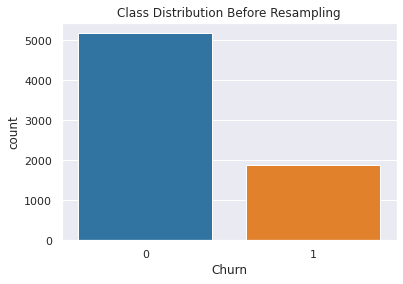

In [ ]:
sns.countplot(x="Churn", data=df).set_title('Class Distribution Before Resampling')

In [ ]:
correl = df.corr()

<AxesSubplot:>

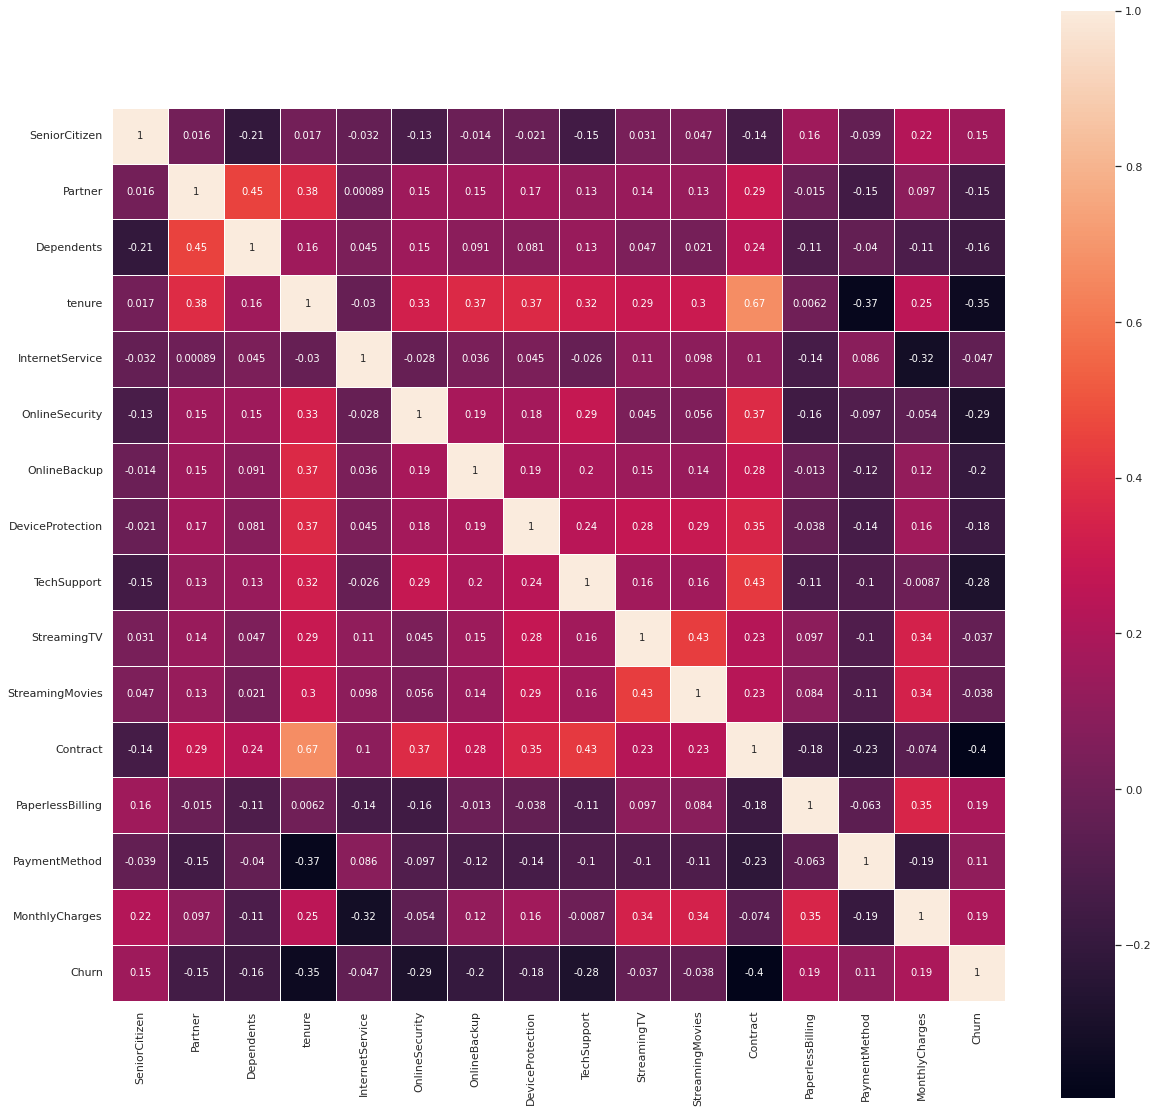

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(data=correl, square=True, annot=True, cbar=True, linewidths=True)

In [ ]:
X = df.drop(['Churn'], axis=1) #features (independent variables)
y = df['Churn'] #target (dependent variable)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=20)

In [ ]:
X_train = X_train.astype(float)

In [ ]:
clf_forest = RandomForestClassifier(n_estimators=100, max_depth=10)
clf_forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=10)

In [ ]:
pred = clf_forest.predict(X_train)

In [ ]:
accuracy_score(y_train, pred)

0.8745118920837771

In [ ]:
pred_test = clf_forest.predict(X_test)

In [ ]:
accuracy_score(y_test, pred_test)

0.815471965933286

In [ ]:
df.to_csv('/content/drive/My Drive/churn_results.csv', index=None)

After Upsampling

In [ ]:
X_no = df[df.Churn == 0]
X_yes = df[df.Churn == 1]

In [ ]:
X_yes_upsampled = X_yes.sample(n=len(X_no), replace=True, random_state=20)
print(len(X_yes_upsampled))

5174


In [ ]:
X_upsampled = X_no.append(X_yes_upsampled).reset_index(drop=True)

Text(0.5, 1.0, 'Class Distribution After Resampling')

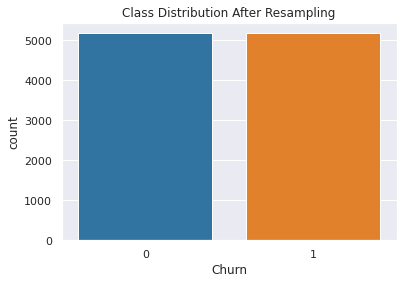

In [ ]:
sns.countplot(x='Churn', data=X_upsampled).set_title('Class Distribution After Resampling')

In [ ]:
correl = X_upsampled.corr()

<AxesSubplot:>

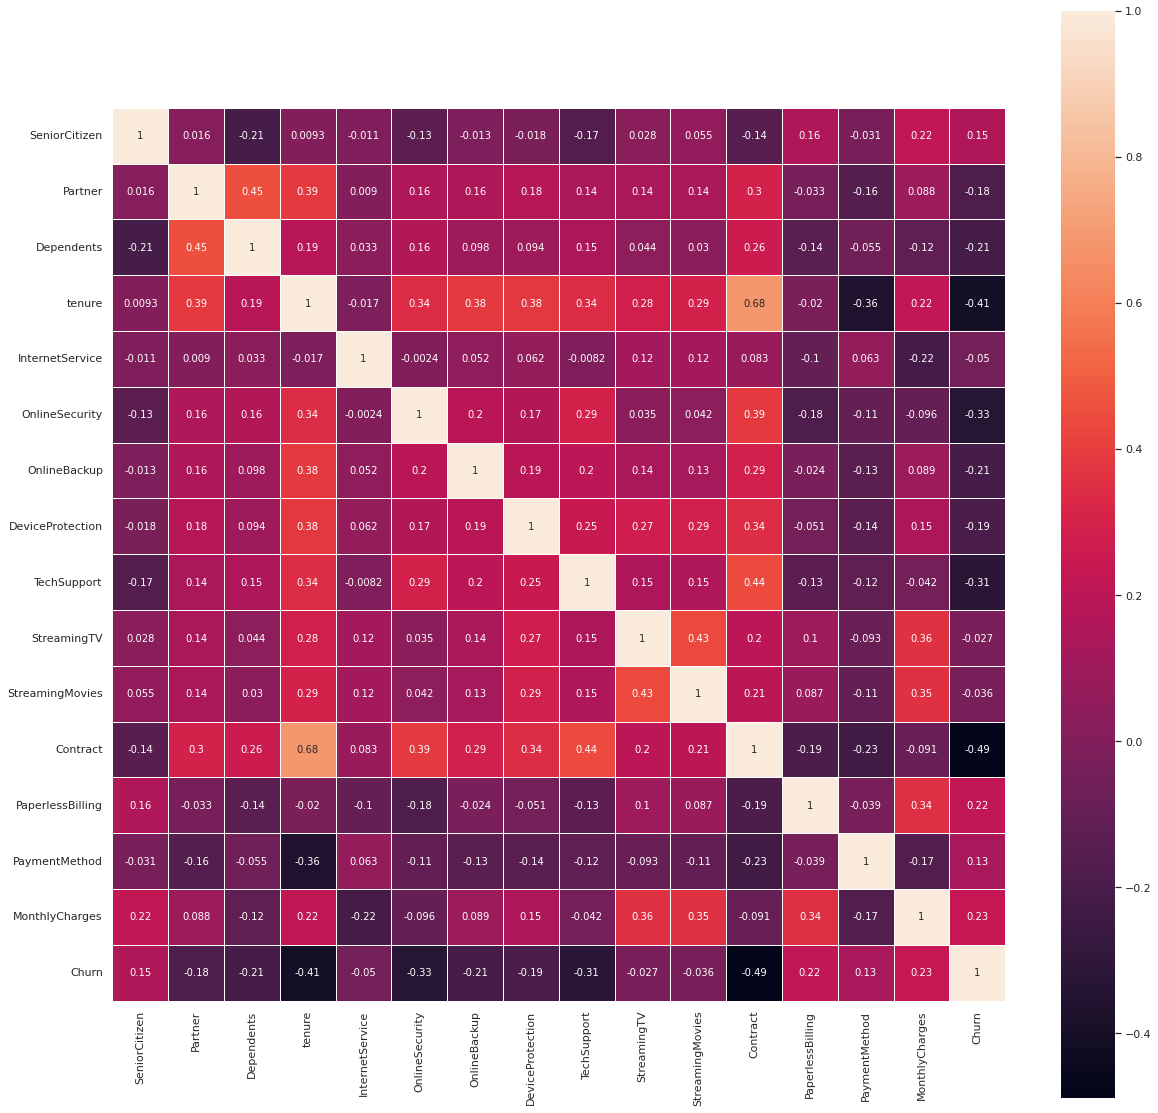

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(data=correl, square=True, annot=True, cbar=True, linewidths=True)

In [ ]:
X = X_upsampled.drop(['Churn'], axis=1) #features (independent variables)
y = X_upsampled['Churn'] #target (dependent variable)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=20)

In [ ]:
print(X_train.dtypes)

SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure              float64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract              int64
PaperlessBilling      int64
PaymentMethod         int64
MonthlyCharges      float64
dtype: object


In [ ]:
X_train = X_train.astype(float)

In [ ]:
clf_forest = RandomForestClassifier(n_estimators=100, max_depth=10)
clf_forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=10)

In [ ]:
pred = clf_forest.predict(X_train)

In [ ]:
accuracy_score(y_train, pred)

0.8863251993235081

In [ ]:
pred_test = clf_forest.predict(X_test)

In [ ]:
accuracy_score(y_test, pred_test)

0.8386473429951691

In [ ]:
X_upsampled.to_csv('/content/drive/My Drive/churn_results.csv', index=None)